In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt # visualization
import seaborn as sns #visualization
import plotly.express #partial dependence analysis

from IPython.core.display import display, HTML

In [2]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
data = pd.read_csv("C:\kaggle\input\effects-of-alchol-on-student-performance\Stats survey.csv")

In [4]:
data = data.dropna() #Remove Nan Values

In [5]:
cols = ['Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)', 
        'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', 
        'Your Accommodation Status Last Year (2023)', 
        'Were you on scholarship/bursary in 2023?', 'Additional amount of studying (in hrs) per week',
        'How often do you go out partying/socialising during the week? ', 'On a night out, how many alcoholic drinks do you consume?',
        'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)', 
        'How many modules have you failed thus far into your studies?', 'Are you currently in a romantic relationship?', 
        'How strong is your relationship with your parent/s?'
        ]
data = data[cols]
mapping = {'Your Sex?': {'Female':0, 'Male':1},
           'Your Accommodation Status Last Year (2023)': {'Non-private accommodation ie. Res':0, 'Private accommodation/ stay with family/friends':1},
           'Additional amount of studying (in hrs) per week': {'0':0, '8+':8, '3-5':4, '1-3':2, '5-8':6},
           'Were you on scholarship/bursary in 2023?': {'No':0, 'Yes (NSFAS, etc...)':1},
           'How often do you go out partying/socialising during the week? ':{'0':0, 'Only weekends':1,'1':1, '2':2, '3':3, '4+':4},
           'On a night out, how many alcoholic drinks do you consume?':{'8+':8, '3-5':4, '1-3':2, '5-8':6, '0':0},
           'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)':{'0':0,'1':1, '2':2, '3':3, '4+':4},
           'How many modules have you failed thus far into your studies?':{'0':0, '1':1, '2':2, '3':3, '4+':4},
           'Are you currently in a romantic relationship?':{'No':0,'Yes':1},
           'How strong is your relationship with your parent/s?': {'Distant':0, 'Fair':1, 'Close':2, 'Very close':3}
            }
for column in list(mapping.keys()):
    data[column] = data[column].map(mapping[column])
data['Your Matric (grade 12) Average/ GPA (in %)'] = data['Your Matric (grade 12) Average/ GPA (in %)'].apply(lambda x: 1 if x > 80 else 0)
data

,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,How strong is your relationship with your parent/s?
0,0,0,72.0,1,0,8,1,8,3,0,1,3
1,1,1,75.0,1,1,8,1,4,4,0,0,3
2,1,0,55.0,1,0,4,2,8,3,0,0,3
3,1,1,84.0,1,0,4,3,8,2,0,1,3
4,0,0,52.0,1,0,4,1,6,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,80.0,1,0,0,4,8,4,0,0,3
396,0,0,74.0,1,0,2,1,2,0,0,0,3
397,1,1,70.0,1,0,6,2,4,2,0,1,1
398,0,0,60.0,1,0,6,1,2,0,3,0,2


In [6]:
data.head(20)

,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,How strong is your relationship with your parent/s?
0,0,0,72.0,1,0,8,1,8,3,0,1,3
1,1,1,75.0,1,1,8,1,4,4,0,0,3
2,1,0,55.0,1,0,4,2,8,3,0,0,3
3,1,1,84.0,1,0,4,3,8,2,0,1,3
4,0,0,52.0,1,0,4,1,6,1,3,0,1
6,1,0,54.0,1,0,8,2,6,1,0,0,3
7,0,1,75.0,1,0,4,3,4,2,0,1,3
11,0,0,75.0,1,0,8,3,8,0,0,0,2
12,1,0,64.0,1,0,4,2,4,2,4,0,3
13,0,0,76.0,1,0,2,1,4,0,0,1,3


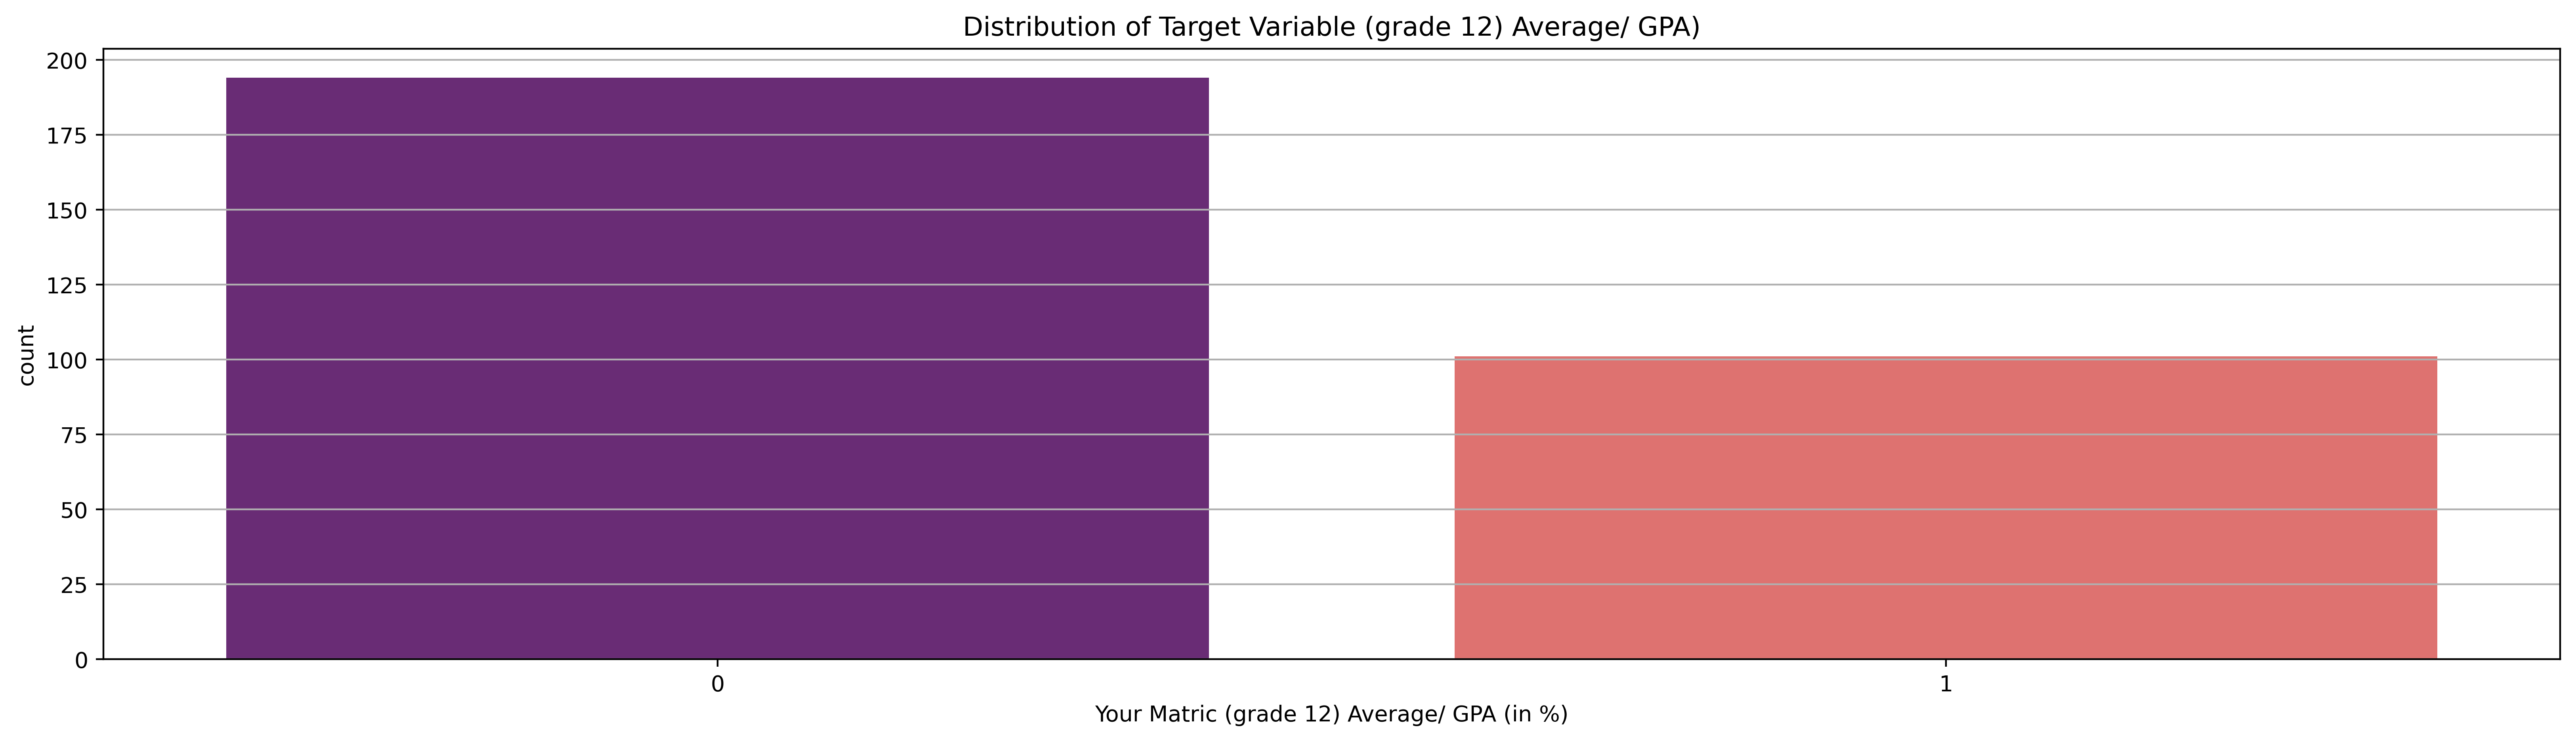

In [7]:
plt.figure(figsize=(20, 5), dpi=400)
sns.countplot(x = data['Your Matric (grade 12) Average/ GPA (in %)'], palette='magma')
ax = plt.gca()
ax.grid(which='major', axis='y', linestyle='-')
plt.title('Distribution of Target Variable (grade 12) Average/ GPA)')
plt.show()

In [8]:
data = data.drop('Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', axis=1)

In [9]:
x = data.drop('Your Matric (grade 12) Average/ GPA (in %)', axis=1)
y = data['Your Matric (grade 12) Average/ GPA (in %)']

In [10]:
data

,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),Your Accommodation Status Last Year (2023),Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,How strong is your relationship with your parent/s?
0,0,0,1,0,8,1,8,3,0,1,3
1,1,1,1,1,8,1,4,4,0,0,3
2,1,0,1,0,4,2,8,3,0,0,3
3,1,1,1,0,4,3,8,2,0,1,3
4,0,0,1,0,4,1,6,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,1,0,0,4,8,4,0,0,3
396,0,0,1,0,2,1,2,0,0,0,3
397,1,1,1,0,6,2,4,2,0,1,1
398,0,0,1,0,6,1,2,0,3,0,2


In [11]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y,
                                       train_size = 0.7,
                                       random_state = 101)

In [12]:
missing_values = data.isnull().sum()
missing_values

Your Sex?                                                                                            0
Your Matric (grade 12) Average/ GPA (in %)                                                           0
Your Accommodation Status Last Year (2023)                                                           0
Were you on scholarship/bursary in 2023?                                                             0
Additional amount of studying (in hrs) per week                                                      0
How often do you go out partying/socialising during the week?                                        0
On a night out, how many alcoholic drinks do you consume?                                            0
How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)    0
How many modules have you failed thus far into your studies?                                         0
Are you currently in a romantic relationship?                            

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error as mae
prediction = lr.predict(x_test)
print(mae(prediction, y_test))


0.41152417184512435


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
models = {
          'Decision Tree': DecisionTreeRegressor(),
          'Support Vector Regressor': SVR(),
         }

for name in models:
    model = models[name]
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print(f'{name}: {np.round(mae(prediction, y_test), 2)}')

Decision Tree: 0.42
Support Vector Regressor: 0.37


In [21]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9902912621359223
0.6179775280898876


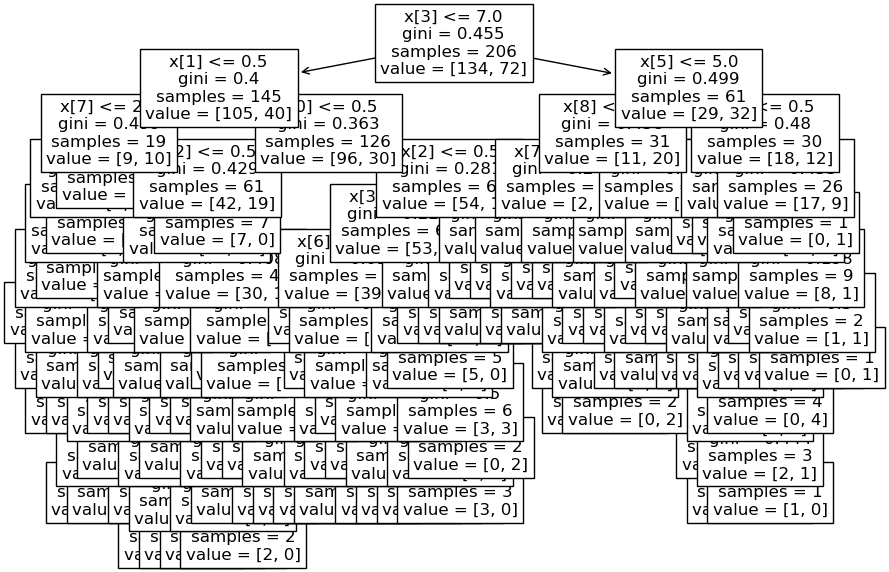

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(model, fontsize = 12)
plt.show()

In [19]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7281553398058253
0.6629213483146067


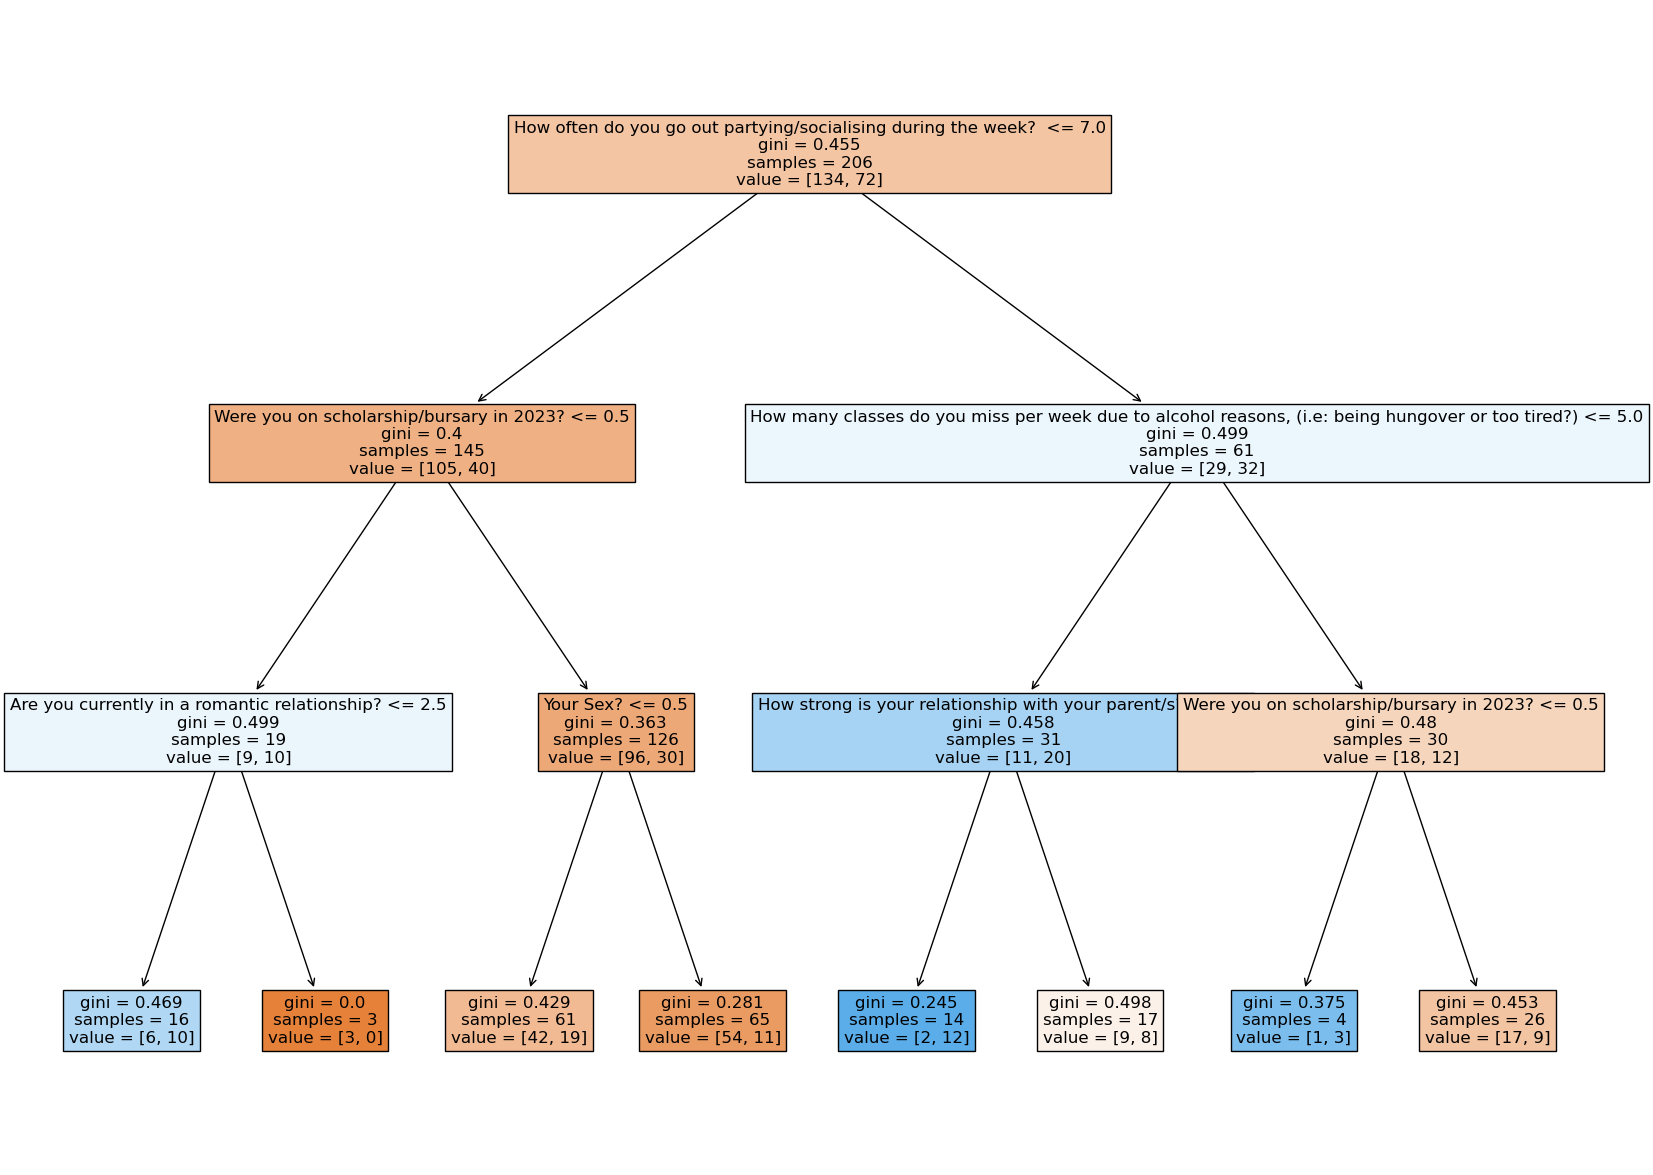

In [20]:
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names=['Your Sex?',
        'Were you on scholarship/bursary in 2023?', 'Additional amount of studying (in hrs) per week',
        'How often do you go out partying/socialising during the week? ', 'On a night out, how many alcoholic drinks do you consume?',
        'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)', 
        'How many modules have you failed thus far into your studies?', 'Are you currently in a romantic relationship?', 
        'How strong is your relationship with your parent/s?'], fontsize=12)
plt.show()

In [24]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8058252427184466
0.6067415730337079


In [25]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7572815533980582
0.651685393258427


In [26]:
model = DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.6990291262135923
0.7078651685393258


[Text(0.5, 0.8333333333333334, 'x[3] <= 7.0\ngini = 0.455\nsamples = 206\nvalue = [134, 72]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\ngini = 0.4\nsamples = 145\nvalue = [105, 40]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.363\nsamples = 126\nvalue = [96, 30]'),
 Text(0.75, 0.5, 'x[5] <= 5.0\ngini = 0.499\nsamples = 61\nvalue = [29, 32]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.48\nsamples = 30\nvalue = [18, 12]')]

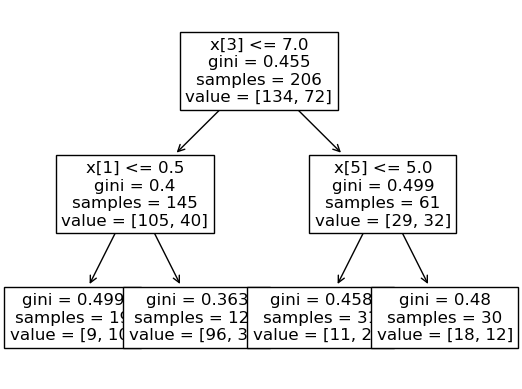

In [27]:
plot_tree(model, fontsize = 12)

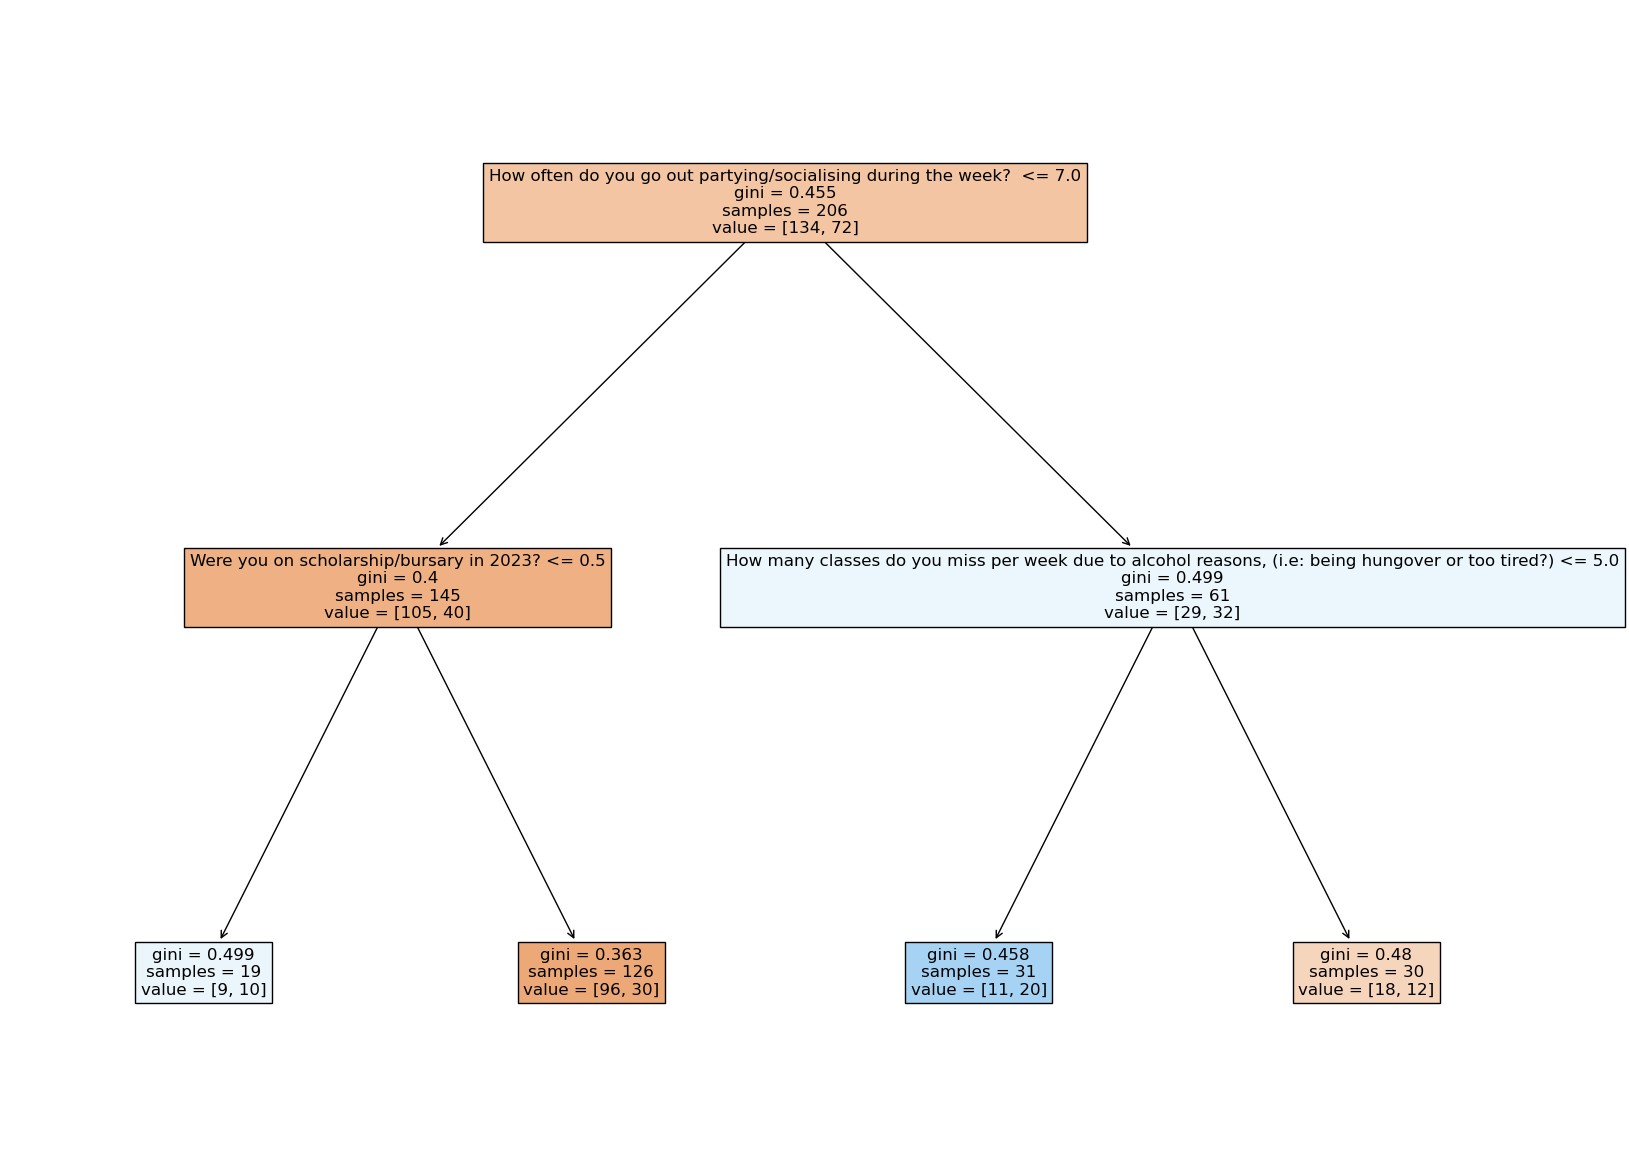

In [28]:
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names=['Your Sex?',
        'Were you on scholarship/bursary in 2023?', 'Additional amount of studying (in hrs) per week',
        'How often do you go out partying/socialising during the week? ', 'On a night out, how many alcoholic drinks do you consume?',
        'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)', 
        'How many modules have you failed thus far into your studies?', 'Are you currently in a romantic relationship?', 
        'How strong is your relationship with your parent/s?'], fontsize=12)
plt.show()

In [29]:
data = pd.read_csv("C:\kaggle\input\effects-of-alchol-on-student-performance\Stats survey.csv")
data = data.dropna() #Remove Nan Values
cols = ['Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)',  
        'Your Accommodation Status Last Year (2023)', 
        'Additional amount of studying (in hrs) per week',
        'How often do you go out partying/socialising during the week? ', 'On a night out, how many alcoholic drinks do you consume?',
        'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)', 
        'How many modules have you failed thus far into your studies?', 'Are you currently in a romantic relationship?', 
        'How strong is your relationship with your parent/s?'
        ]
data = data[cols]
mapping = {'Your Sex?': {'Female':0, 'Male':1},
           'Your Accommodation Status Last Year (2023)': {'Non-private accommodation ie. Res':0, 'Private accommodation/ stay with family/friends':1},
           'Additional amount of studying (in hrs) per week': {'0':0, '8+':8, '3-5':4, '1-3':2, '5-8':6},
           'How often do you go out partying/socialising during the week? ':{'0':0, 'Only weekends':1,'1':1, '2':2, '3':3, '4+':4},
           'On a night out, how many alcoholic drinks do you consume?':{'8+':8, '3-5':4, '1-3':2, '5-8':6, '0':0},
           'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)':{'0':0,'1':1, '2':2, '3':3, '4+':4},
           'How many modules have you failed thus far into your studies?':{'0':0, '1':1, '2':2, '3':3, '4+':4},
           'Are you currently in a romantic relationship?':{'No':0,'Yes':1},
           'How strong is your relationship with your parent/s?': {'Distant':0, 'Fair':1, 'Close':2, 'Very close':3}
            }
for column in list(mapping.keys()):
    data[column] = data[column].map(mapping[column])
data['Your Matric (grade 12) Average/ GPA (in %)'] = data['Your Matric (grade 12) Average/ GPA (in %)'].apply(lambda x: 1 if x > 80 else 0)
x = data.drop('Your Matric (grade 12) Average/ GPA (in %)', axis=1)
y = data['Your Matric (grade 12) Average/ GPA (in %)']
data

,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),Your Accommodation Status Last Year (2023),Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,How strong is your relationship with your parent/s?
0,0,0,1,8,1,8,3,0,1,3
1,1,1,1,8,1,4,4,0,0,3
2,1,0,1,4,2,8,3,0,0,3
3,1,1,1,4,3,8,2,0,1,3
4,0,0,1,4,1,6,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...
395,1,0,1,0,4,8,4,0,0,3
396,0,0,1,2,1,2,0,0,0,3
397,1,1,1,6,2,4,2,0,1,1
398,0,0,1,6,1,2,0,3,0,2


In [30]:
missing_values = data.isnull().sum()
missing_values

Your Sex?                                                                                            0
Your Matric (grade 12) Average/ GPA (in %)                                                           0
Your Accommodation Status Last Year (2023)                                                           0
Additional amount of studying (in hrs) per week                                                      0
How often do you go out partying/socialising during the week?                                        0
On a night out, how many alcoholic drinks do you consume?                                            0
How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)    0
How many modules have you failed thus far into your studies?                                         0
Are you currently in a romantic relationship?                                                        0
How strong is your relationship with your parent/s?                      

In [31]:
x_train, x_test, y_train, y_test = tts(x, y,
                                       train_size = 0.7,
                                       random_state = 101)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9805825242718447
0.5056179775280899


In [32]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7912621359223301
0.6404494382022472


In [33]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7475728155339806
0.6741573033707865


In [34]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7281553398058253
0.6629213483146067


In [35]:
model = DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.6990291262135923
0.7078651685393258


In [36]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7475728155339806
0.6741573033707865


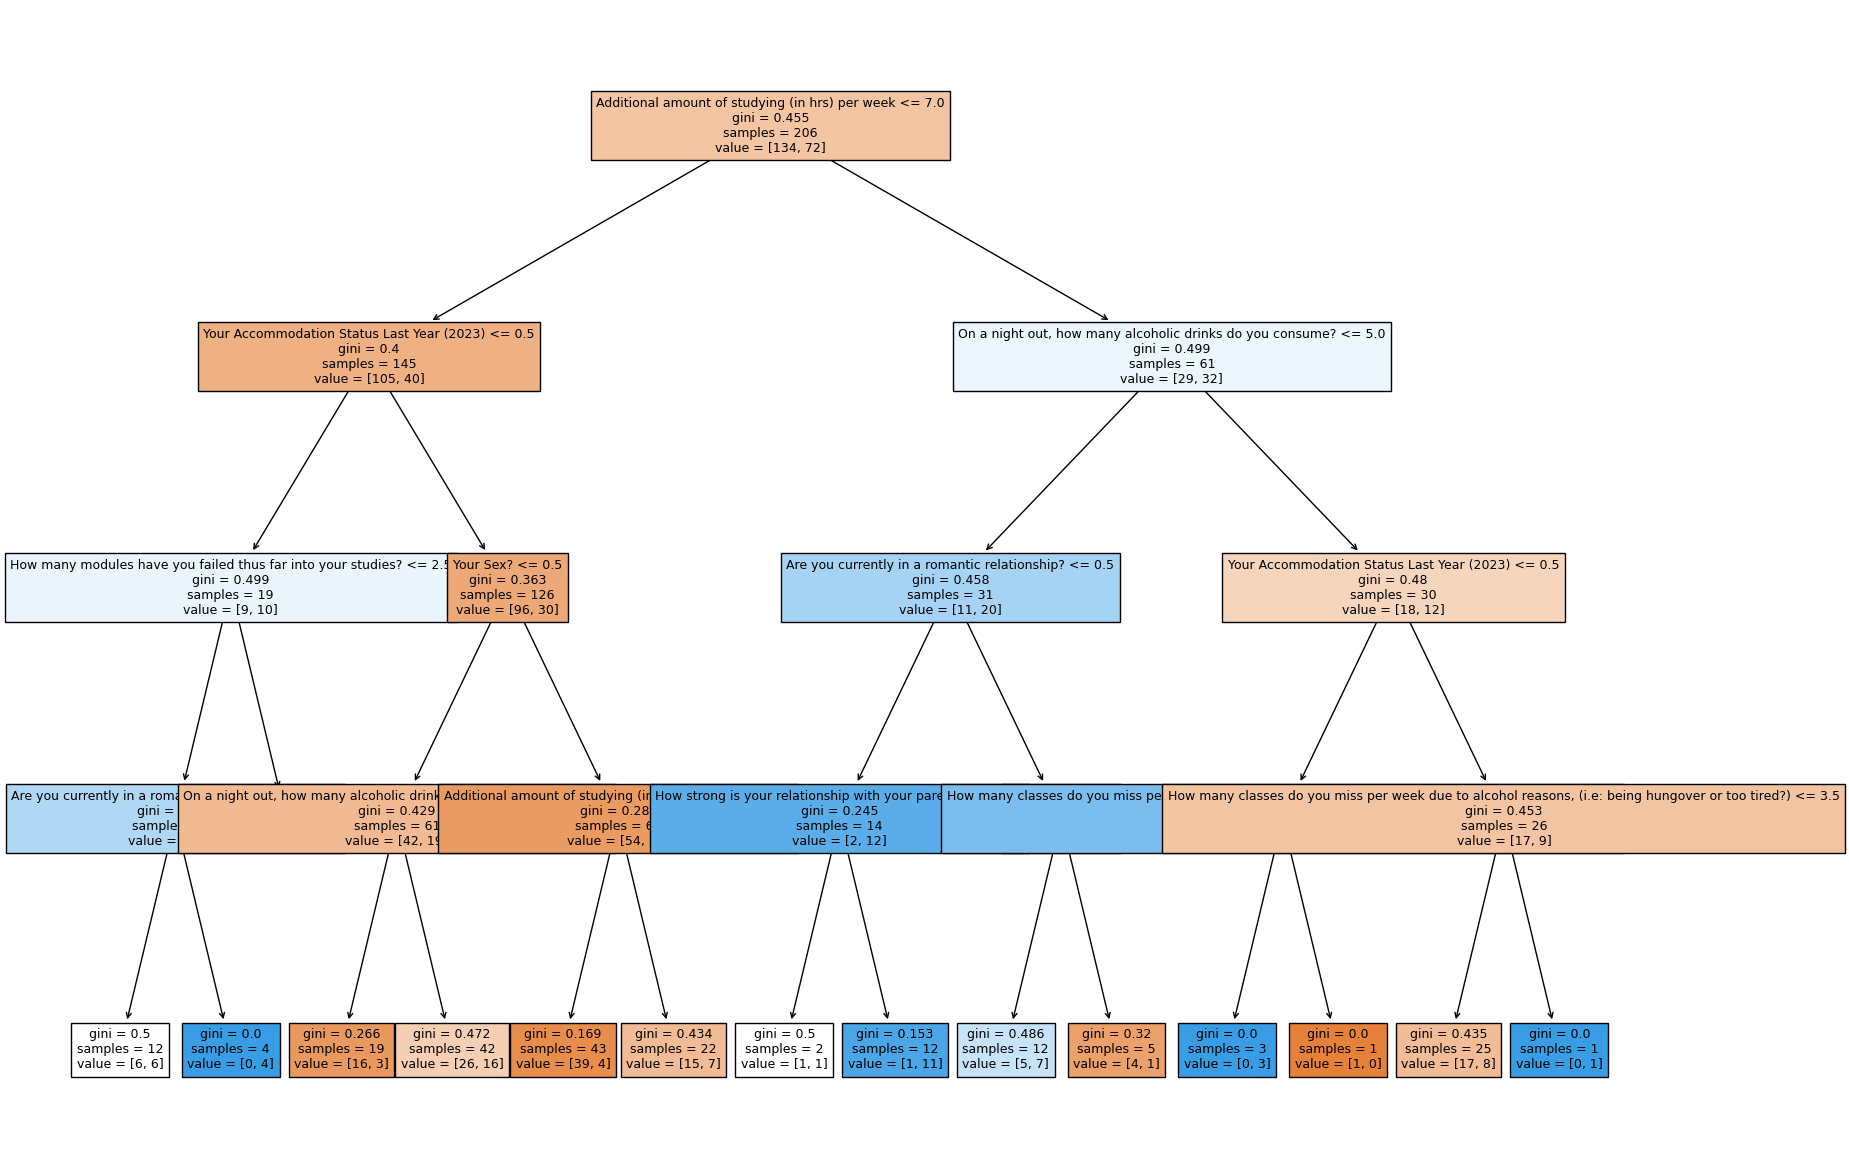

In [43]:
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names=['Your Sex?',
        'Your Accommodation Status Last Year (2023)',
        'Additional amount of studying (in hrs) per week',
        'How often do you go out partying/socialising during the week? ', 'On a night out, how many alcoholic drinks do you consume?',
        'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)', 
        'How many modules have you failed thus far into your studies?', 'Are you currently in a romantic relationship?', 
        'How strong is your relationship with your parent/s?'], fontsize=9)
plt.show()